## Analítica Computacional para la Toma de Decisiones 2024

### Clases 11-12: Introducción a redes neuronales

- Perceptrón Multicapa (MultiLayer perceptron - MLP)
- Redes densas
- Funciones de activación y pérdida

Iniciamos verificando que la versión de python sea por lo menos 3.7

In [1]:
import sys
assert sys.version_info >= (3, 7)

Verificamos ahora que la versión de Scikit learn sea por lo menos 1.0.1

In [2]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

Y que la versión de Tensorflow sea por lo menos 2.8.0

In [3]:
import tensorflow as tf

assert version.parse(tf.__version__) >= version.parse("2.8.0")

Entrenamos un perceptrón usando Scikit Learn sobre los datos Iris para clasificar si una observación corresponde a la especie Setosa o no

In [5]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0)  # Iris setosa


In [6]:
print(iris.data)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


Exploremos las observaciones (características)

In [7]:
print(X.shape)
print(X[0:5,])
print(X[-5:150,])

(150, 2)
[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]
[[5.2 2.3]
 [5.  1.9]
 [5.2 2. ]
 [5.4 2.3]
 [5.1 1.8]]


Exploremos las observaciones (etiquetas)

In [8]:
print(y.shape)
print(y[0:5,])
print(y[-5:150,])

(150,)
0    True
1    True
2    True
3    True
4    True
Name: target, dtype: bool
145    False
146    False
147    False
148    False
149    False
Name: target, dtype: bool


Entrenemos el perceptron usando una semilla para hacer que los experimentos sean repetibles

In [9]:
perc = Perceptron(random_state=42)
perc.fit(X, y)

Perceptron(random_state=42)

Probemos el modelo con un par de datos nuevos

In [10]:
Xnew = [[2, 0.3], [4, 2]]
ypred = perc.predict(Xnew)  
print(ypred)

[ True False]


Gráfico de las observaciones clasificadas en cada grupo: Setosa o no Setosa

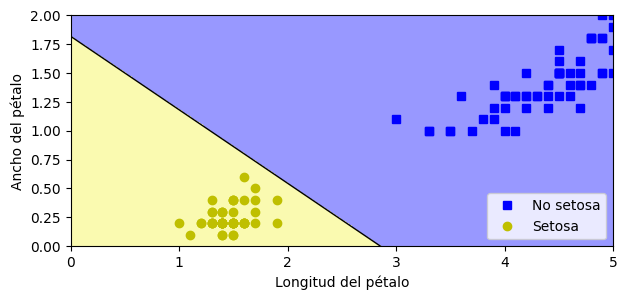

In [11]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

a = -perc.coef_[0, 0] / perc.coef_[0, 1]
b = -perc.intercept_ / perc.coef_[0, 1]
axes = [0, 5, 0, 2]
x0, x1 = np.meshgrid(
    np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
    np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = perc.predict(X_new)
zz = y_predict.reshape(x0.shape)
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.figure(figsize=(7, 3))
plt.plot(X[y == 0, 0], X[y == 0, 1], "bs", label="No setosa")
plt.plot(X[y == 1, 0], X[y == 1, 1], "yo", label="Setosa")
plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-",
         linewidth=1)
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Longitud del pétalo")
plt.ylabel("Ancho del pétalo")
plt.legend(loc="lower right")
plt.axis(axes)
plt.show()

Ahora utilicemos un perceptrón multicapa, con los datos completos de Iris, dividiendo los datos en entrenamiento, validación y prueba

In [12]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

iris = load_iris()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42)



Estandaricemos los datos de entrada y entrenemos un perceptrón multicapa con una capa oculta con 3 neuronas

In [13]:
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
mlp_clf = MLPClassifier(hidden_layer_sizes=[5], max_iter=1000,
                        random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_clf)
pipeline.fit(X_train, y_train)
accuracy = pipeline.score(X_valid, y_valid)
accuracy

c:\Users\57313\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9166666666666666

Ahora construyamos el mismo modelo usando Keras y Tensorflow

In [15]:
import tensorflow as tf

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = load_iris()


print(iris.data[0:3,])
print(iris.target[0:3,])

y = tf.keras.utils.to_categorical(iris.target, num_classes=3)

print(y[0:3,])
print(y.shape)
X_train_full, X_test, y_train_full, y_test = train_test_split(
    iris.data, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42)

X_train.shape

std_scl = StandardScaler()
std_scl.fit(X_train)

print(X_train[0:3,])
X_train = std_scl.transform(X_train)
print(X_train[0:3,])
X_valid = std_scl.transform(X_valid)
X_test = std_scl.transform(X_test)



[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]
[0 0 0]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
(150, 3)
[[6.  3.  4.8 1.8]
 [6.7 3.1 4.7 1.5]
 [5.5 2.4 3.7 1. ]]
[[ 0.16110746 -0.23717928  0.58382847  0.77996804]
 [ 1.01358158 -0.01611898  0.52732894  0.3865691 ]
 [-0.44780262 -1.56354107 -0.03766635 -0.2690958 ]]


In [16]:
X_train.dtype

dtype('float64')

In [17]:
tf.random.set_seed(42)
tf.keras.backend.clear_session()

model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(4,)))
model.add(tf.keras.layers.Dense(5, activation="relu"))
model.add(tf.keras.layers.Dense(3, activation="softmax"))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 25        
                                                                 
 dense_1 (Dense)             (None, 3)                 18        
                                                                 
Total params: 43 (172.00 Byte)
Trainable params: 43 (172.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model.layers

In [20]:
hidden1 = model.layers[1]
hidden1.name

'dense_1'

In [21]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.01523614, -0.5667523 ,  0.13908678],
       [ 0.33120638,  0.18455034,  0.7003744 ],
       [-0.5827142 , -0.76200455,  0.42884308],
       [ 0.7533662 , -0.01559436,  0.7094695 ],
       [-0.8313799 , -0.7633888 ,  0.7083743 ]], dtype=float32)

In [22]:
weights.shape

(5, 3)

In [23]:
import pandas as pd
pd.DataFrame(weights)

,0,1,2
0,0.015236,-0.566752,0.139087
1,0.331206,0.184550,0.700374
2,-0.582714,-0.762005,0.428843
3,0.753366,-0.015594,0.709469
4,-0.831380,-0.763389,0.708374


In [24]:
biases

array([0., 0., 0.], dtype=float32)

In [25]:
biases.shape

(3,)

In [27]:
pd.DataFrame(biases)

,0
0,0.0
1,0.0
2,0.0


In [28]:
model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [29]:
tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [30]:
history = model.fit(X_train, y_train, epochs=1000,
                    validation_data=(X_valid, y_valid))

Epoch 1/1000


3/3 [==============================] - 3s 303ms/step - loss: 1.3298 - accuracy: 0.4271 - val_loss: 1.7524 - val_accuracy: 0.2083
Epoch 2/1000
3/3 [==============================] - 0s 47ms/step - loss: 1.3083 - accuracy: 0.4375 - val_loss: 1.7179 - val_accuracy: 0.2083
Epoch 3/1000
3/3 [==============================] - 0s 40ms/step - loss: 1.2886 - accuracy: 0.4375 - val_loss: 1.6854 - val_accuracy: 0.2083
Epoch 4/1000
3/3 [==============================] - 0s 45ms/step - loss: 1.2699 - accuracy: 0.4375 - val_loss: 1.6551 - val_accuracy: 0.2500
Epoch 5/1000
3/3 [==============================] - 0s 36ms/step - loss: 1.2524 - accuracy: 0.4271 - val_loss: 1.6273 - val_accuracy: 0.2500
Epoch 6/1000
3/3 [==============================] - 0s 40ms/step - loss: 1.2357 - accuracy: 0.4271 - val_loss: 1.6012 - val_accuracy: 0.2500
Epoch 7/1000
3/3 [==============================] - 0s 34ms/step - loss: 1.2206 - accuracy: 0.4479 - val_loss: 1.5765 - val_accuracy: 0.2500
Epoch 8/10

## Datos MNIST fashion
Ahora entrenemos otro modelo de clasificación, esta vez para datos MNIST fashion

In [31]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [32]:
X_train.shape

(55000, 28, 28)

In [33]:
pd.DataFrame(X_train[0,:])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,4,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,54,0,0,0,1,3,4,0,0,3
5,0,0,0,0,0,0,0,0,0,0,...,144,123,23,0,0,0,0,12,10,0
6,0,0,0,0,0,0,0,0,0,0,...,107,156,161,109,64,23,77,130,72,15
7,0,0,0,0,0,0,0,0,0,0,...,216,163,127,121,122,146,141,88,172,66
8,0,0,0,0,0,0,0,0,0,1,...,223,223,215,213,164,127,123,196,229,0
9,0,0,0,0,0,0,0,0,0,0,...,235,227,224,222,224,221,223,245,173,0


Reescalemos los datos para que cada pixel tenga un valor entre 0 y 1

In [34]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [35]:
pd.DataFrame(X_train[0,:])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.003922,0.015686,0.000000,0.000000,0.000000,0.000000,0.003922,0.003922,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.211765,0.000000,0.000000,0.000000,0.003922,0.011765,0.015686,0.000000,0.000000,0.011765
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.564706,0.482353,0.090196,0.000000,0.000000,0.000000,0.000000,0.047059,0.039216,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.419608,0.611765,0.631373,0.427451,0.250980,0.090196,0.301961,0.509804,0.282353,0.058824
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.847059,0.639216,0.498039,0.474510,0.478431,0.572549,0.552941,0.345098,0.674510,0.258824
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003922,...,0.874510,0.874510,0.843137,0.835294,0.643137,0.498039,0.482353,0.768627,0.898039,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.921569,0.890196,0.878431,0.870588,0.878431,0.866667,0.874510,0.960784,0.678431,0.000000


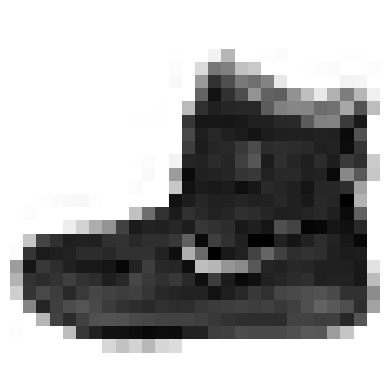

In [36]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [37]:
y_train[0]

9

In [40]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]

'Ankle boot'

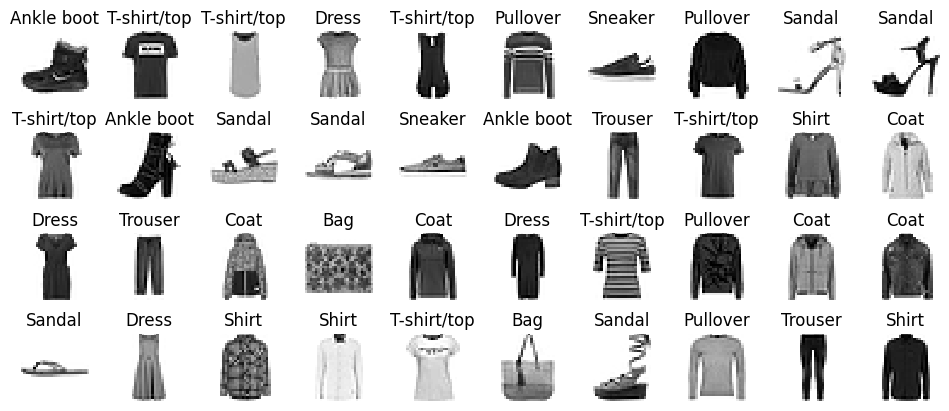

In [41]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Definimos el modelo con
- 1 capa de entrada
- 1 operación de adelgazamiento (flatten)
- 2 capas densas con función de activación ReLU
- 1 capa de salida con función de activación softmax (clasificación) con tantas neuronas como categorías tenemos etiquetadas (10)

In [43]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

Epoch 1/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.7725 - accuracy: 0.7496 - val_loss: 0.5541 - val_accuracy: 0.8136
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5291 - accuracy: 0.8210 - val_loss: 0.4881 - val_accuracy: 0.8294
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4799 - accuracy: 0.8347 - val_loss: 0.4506 - val_accuracy: 0.8394
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4549 - accuracy: 0.8433 - val_loss: 0.4308 - val_accuracy: 0.8488
Epoch 5/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4358 - accuracy: 0.8491 - val_loss: 0.4210 - val_accuracy: 0.8514
Epoch 6/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4211 - accuracy: 0.8542 - val_loss: 0.4287 - val_accuracy: 0.8476
Epoch 7/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4100 - accuracy: 0.8586 - val_loss: 0.4036 - val_accura

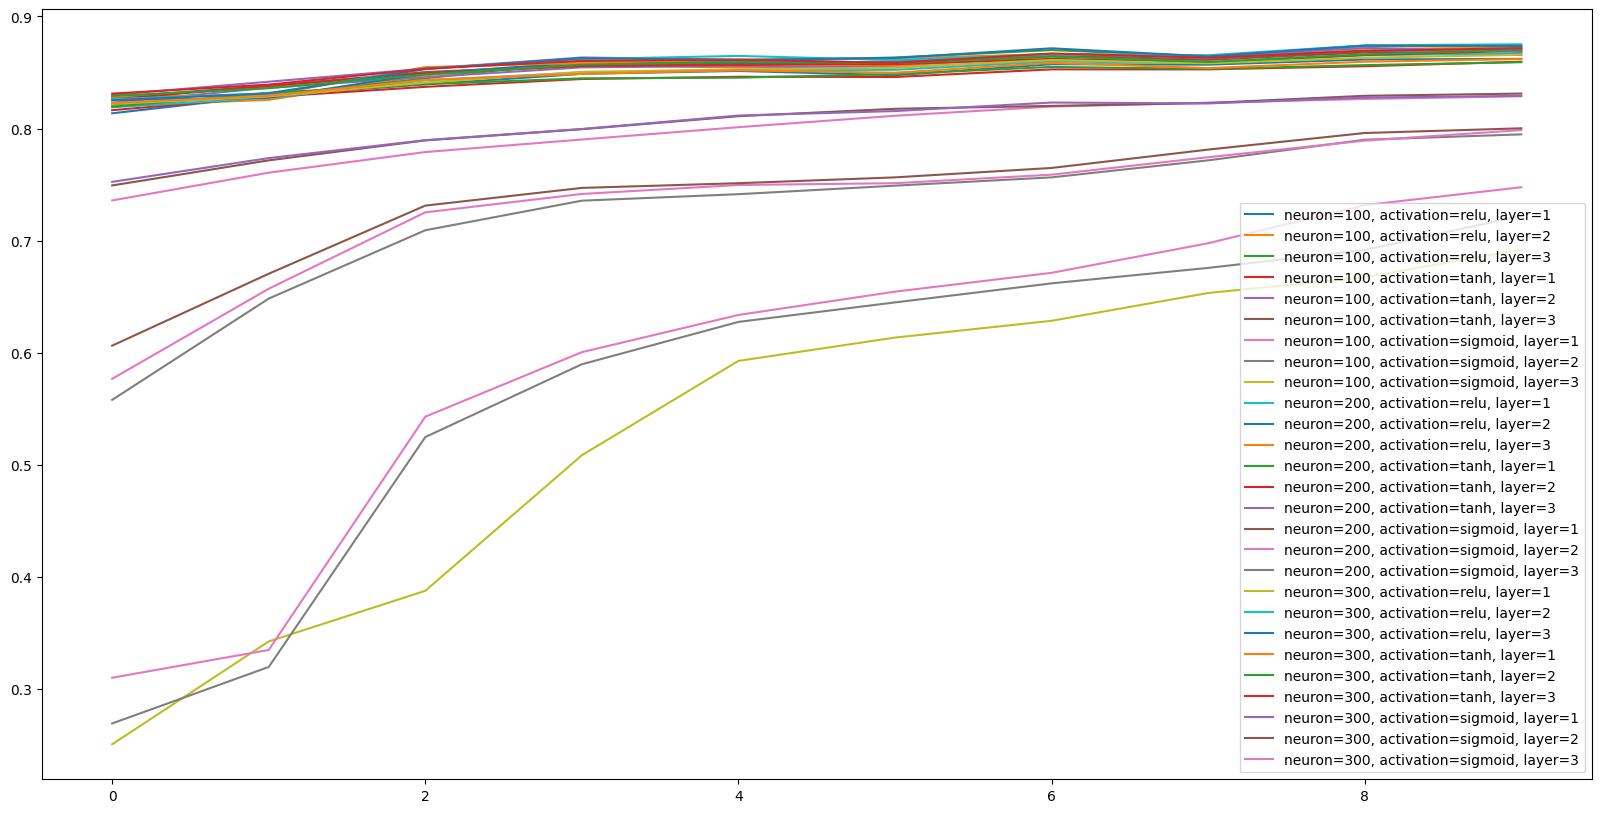

In [52]:
import matplotlib.pyplot as plt

# Define los valores de los hiperparámetros que quieres probar
neurons = [100, 200, 300]
activations = ['relu', 'tanh', 'sigmoid']
layers = [1, 2, 3]

# Inicializa una lista para almacenar los resultados
results = []

# Itera sobre todas las combinaciones de hiperparámetros
for neuron in neurons:
    for activation in activations:
        for layer in layers:
            # Crea y entrena el modelo con los hiperparámetros actuales
            tf.keras.backend.clear_session()
            tf.random.set_seed(42)
            model = tf.keras.Sequential()
            model.add(tf.keras.layers.InputLayer(input_shape=[28, 28]))
            model.add(tf.keras.layers.Flatten())
            for _ in range(layer):
                model.add(tf.keras.layers.Dense(neuron, activation=activation))
            model.add(tf.keras.layers.Dense(10, activation="softmax"))
            model.compile(loss="sparse_categorical_crossentropy",
                          optimizer="sgd",
                          metrics=["accuracy"])
            history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
            
            # Almacena los resultados
            results.append({
                'neuron': neuron,
                'activation': activation,
                'layer': layer,
                'history': history,
            })

# Crea una figura para visualizar los resultados
plt.figure(figsize=(20, 10))

# Itera sobre los resultados y crea un gráfico para cada uno
for result in results:
    plt.plot(result['history'].history['val_accuracy'], label=f"neuron={result['neuron']}, activation={result['activation']}, layer={result['layer']}")

# Añade una leyenda y muestra el gráfico
plt.legend()
plt.show()

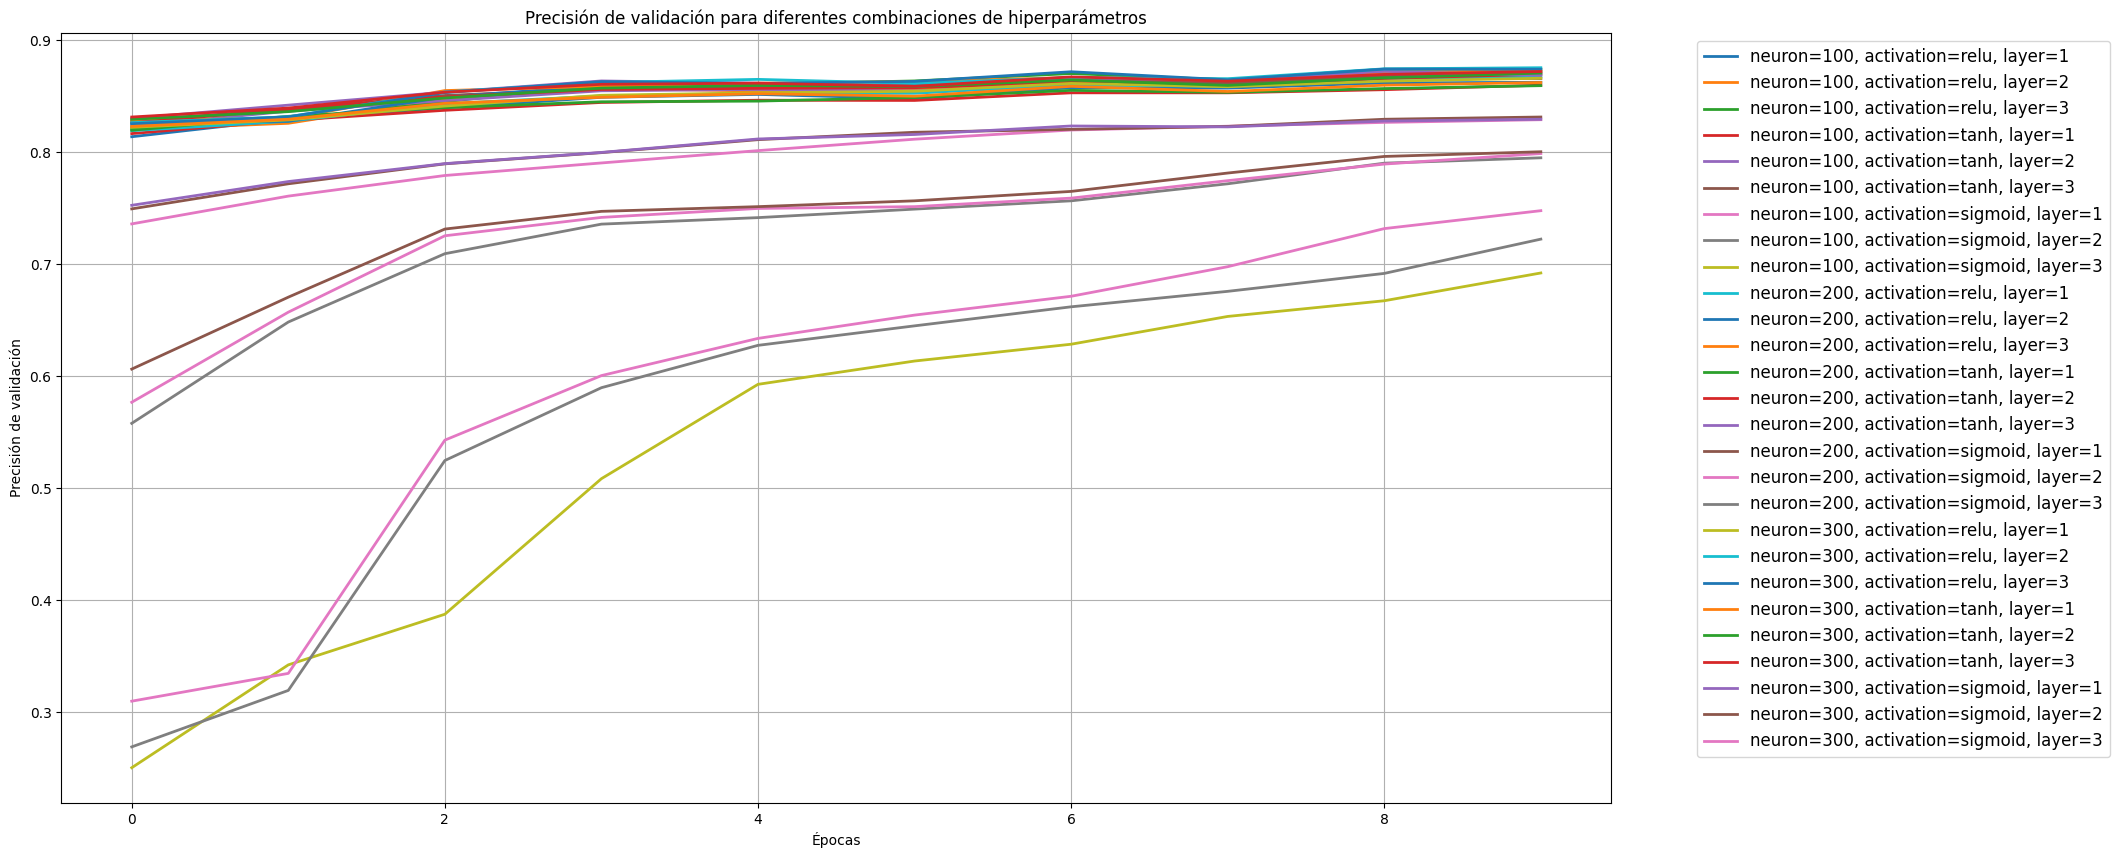

In [56]:
# Crea una figura para visualizar los resultados
plt.figure(figsize=(20, 10))

# Añade títulos y etiquetas a los ejes
plt.title('Precisión de validación para diferentes combinaciones de hiperparámetros')
plt.xlabel('Épocas')
plt.ylabel('Precisión de validación')

# Itera sobre los resultados y crea un gráfico para cada uno
for result in results:
    plt.plot(result['history'].history['val_accuracy'], label=f"neuron={result['neuron']}, activation={result['activation']}, layer={result['layer']}", linewidth=2)

# Añade una cuadrícula
plt.grid(True)

# Añade una leyenda fuera del gráfico en la parte derecha
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='large')

# Muestra el gráfico
plt.show()

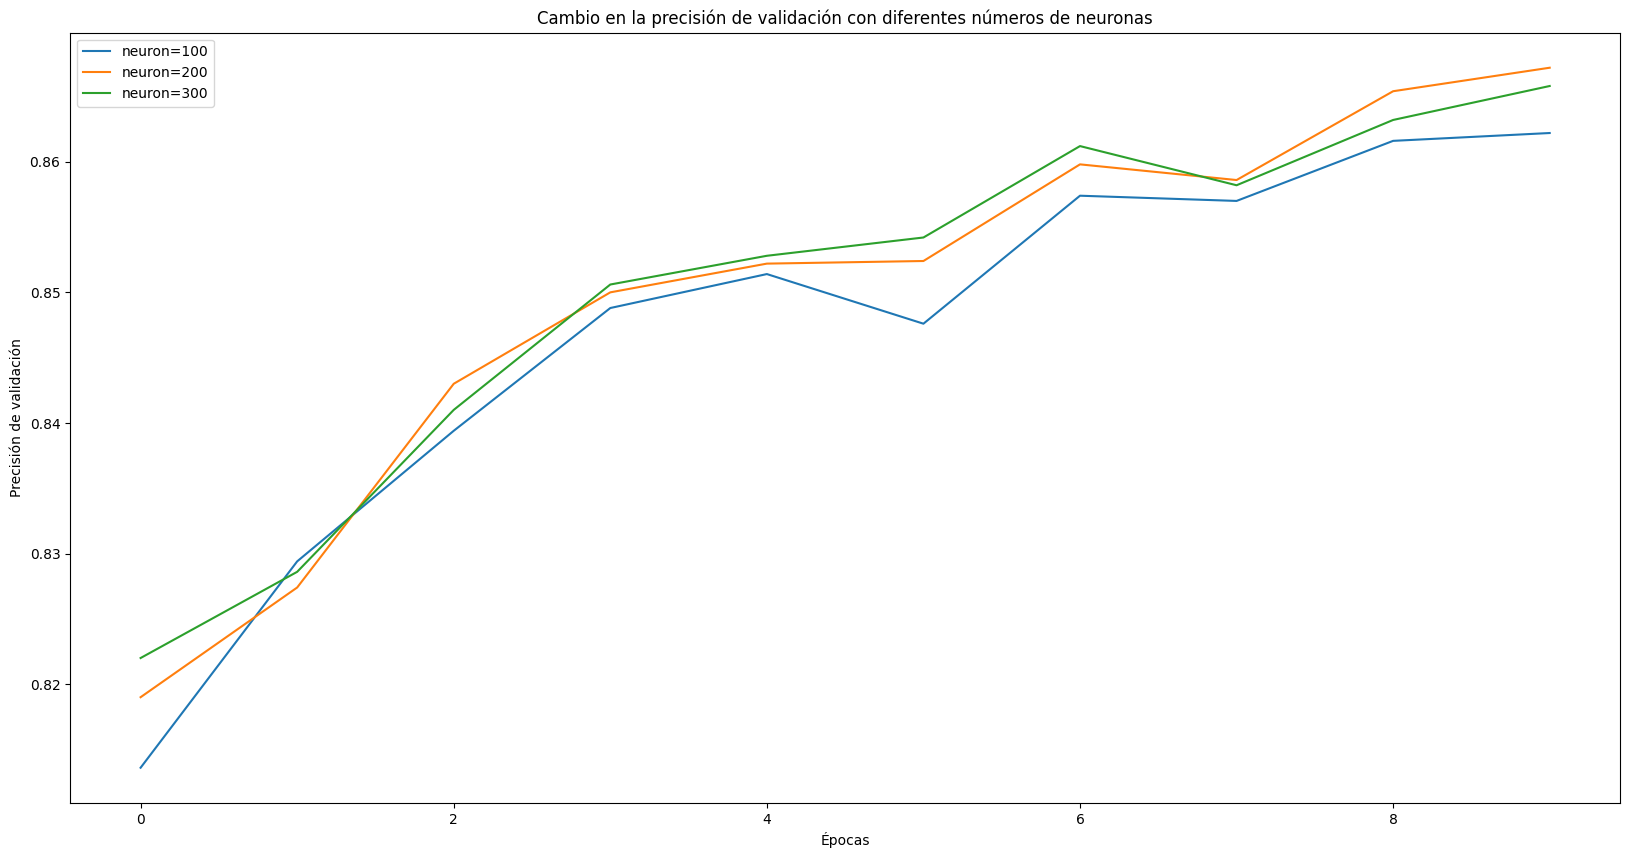

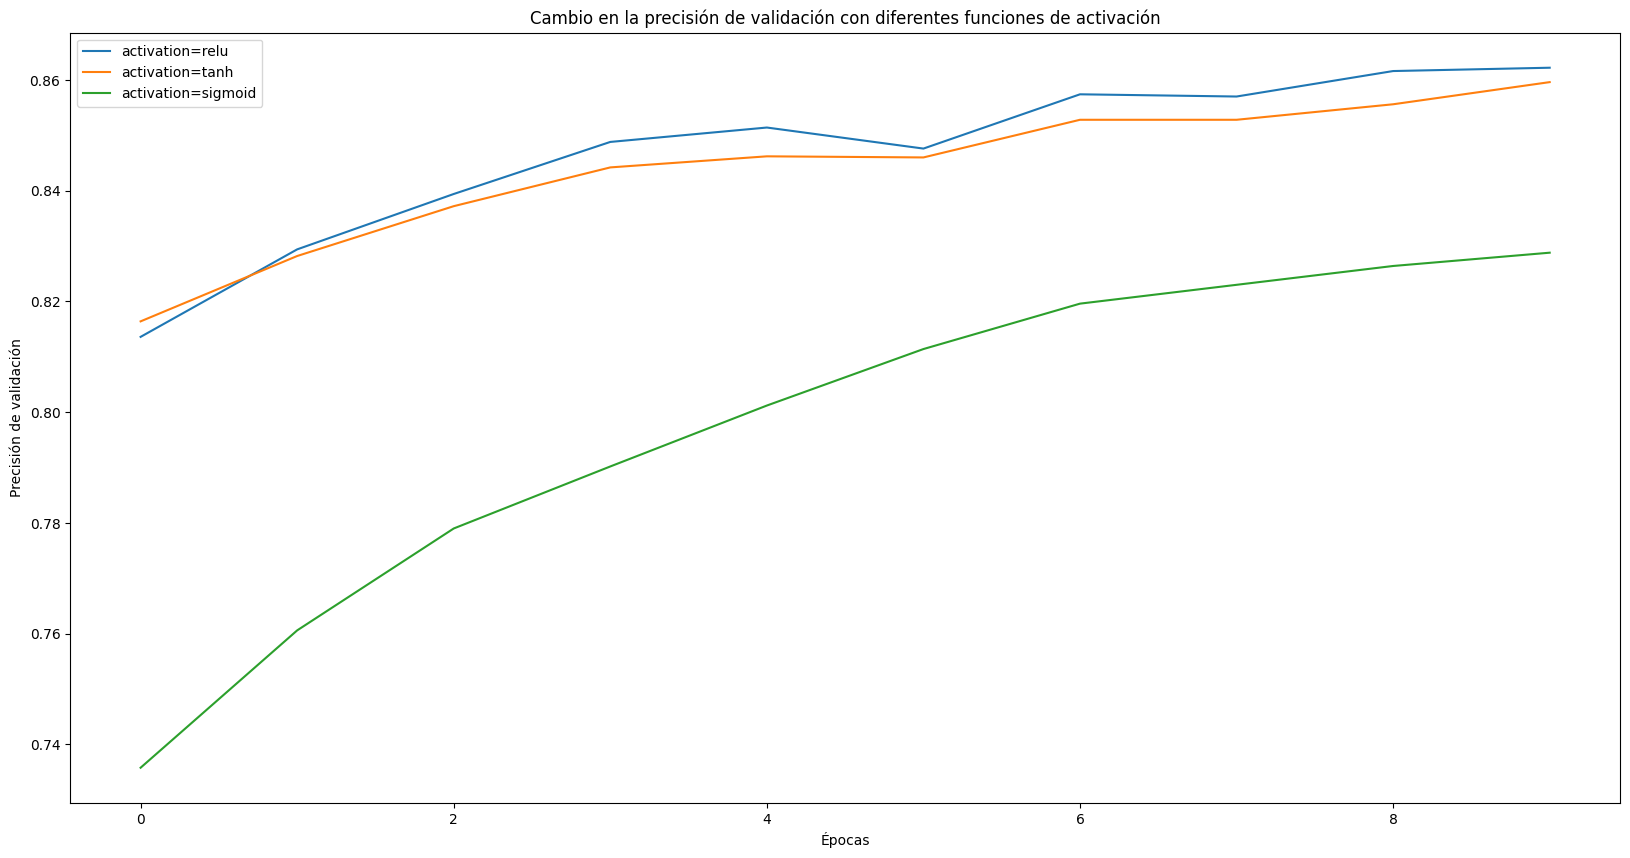

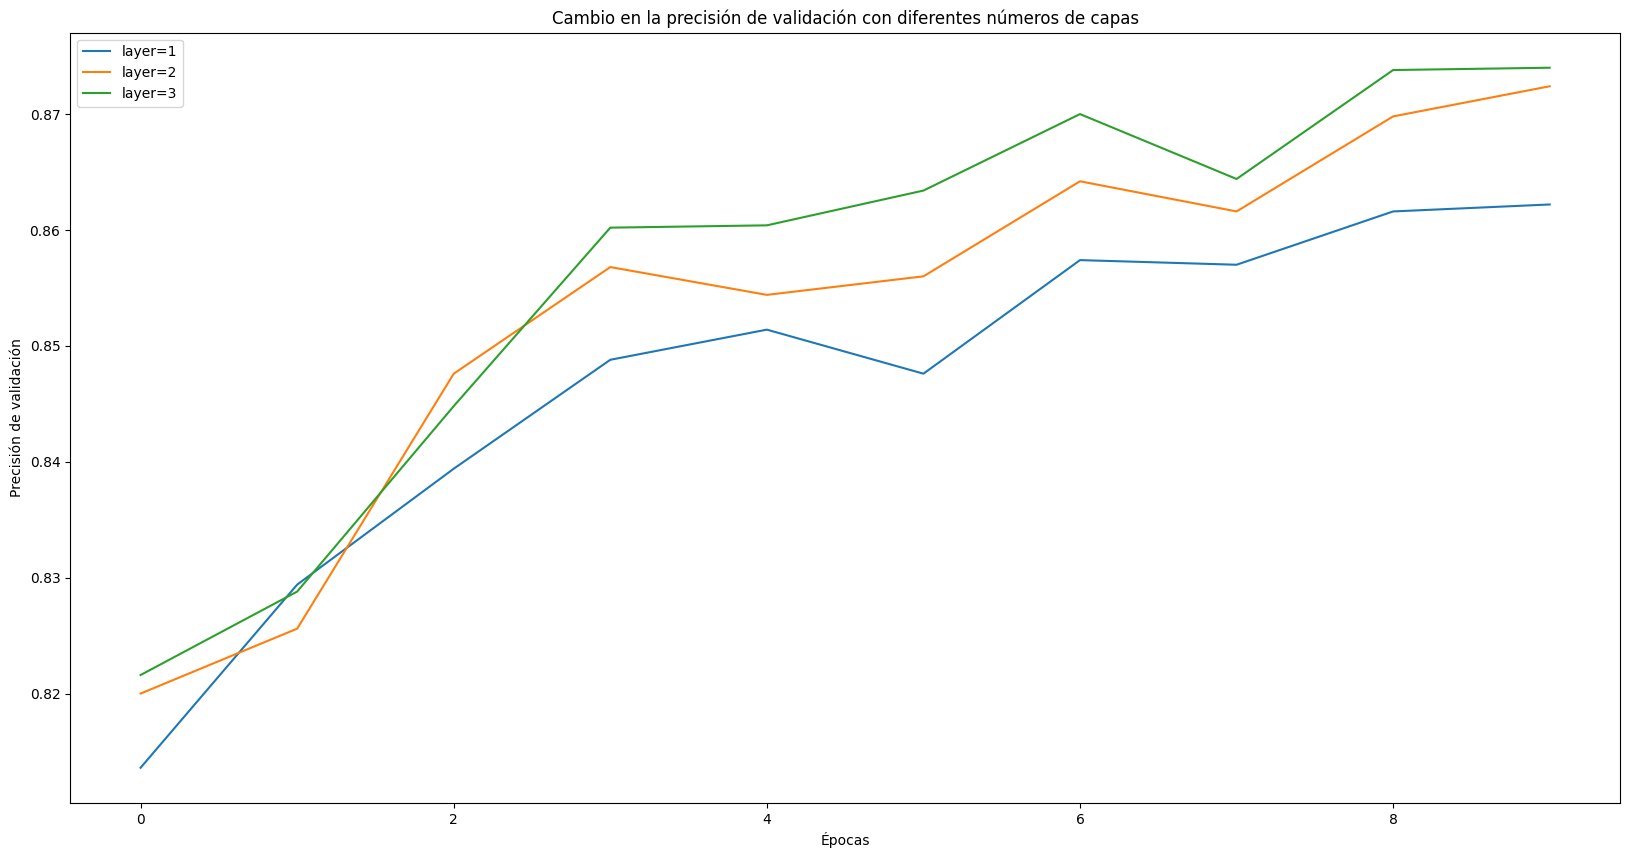

In [53]:
# Crea una figura para visualizar los resultados de cambiar el número de neuronas
plt.figure(figsize=(20, 10))
plt.title('Cambio en la precisión de validación con diferentes números de neuronas')
plt.xlabel('Épocas')
plt.ylabel('Precisión de validación')
for result in results:
    if result['activation'] == 'relu' and result['layer'] == 1:  # solo cambia 'neuron'
        plt.plot(result['history'].history['val_accuracy'], label=f"neuron={result['neuron']}")
plt.legend()
plt.show()

# Crea una figura para visualizar los resultados de cambiar la función de activación
plt.figure(figsize=(20, 10))
plt.title('Cambio en la precisión de validación con diferentes funciones de activación')
plt.xlabel('Épocas')
plt.ylabel('Precisión de validación')
for result in results:
    if result['neuron'] == 100 and result['layer'] == 1:  # solo cambia 'activation'
        plt.plot(result['history'].history['val_accuracy'], label=f"activation={result['activation']}")
plt.legend()
plt.show()

# Crea una figura para visualizar los resultados de cambiar el número de capas
plt.figure(figsize=(20, 10))
plt.title('Cambio en la precisión de validación con diferentes números de capas')
plt.xlabel('Épocas')
plt.ylabel('Precisión de validación')
for result in results:
    if result['neuron'] == 100 and result['activation'] == 'relu':  # solo cambia 'layer'
        plt.plot(result['history'].history['val_accuracy'], label=f"layer={result['layer']}")
plt.legend()
plt.show()

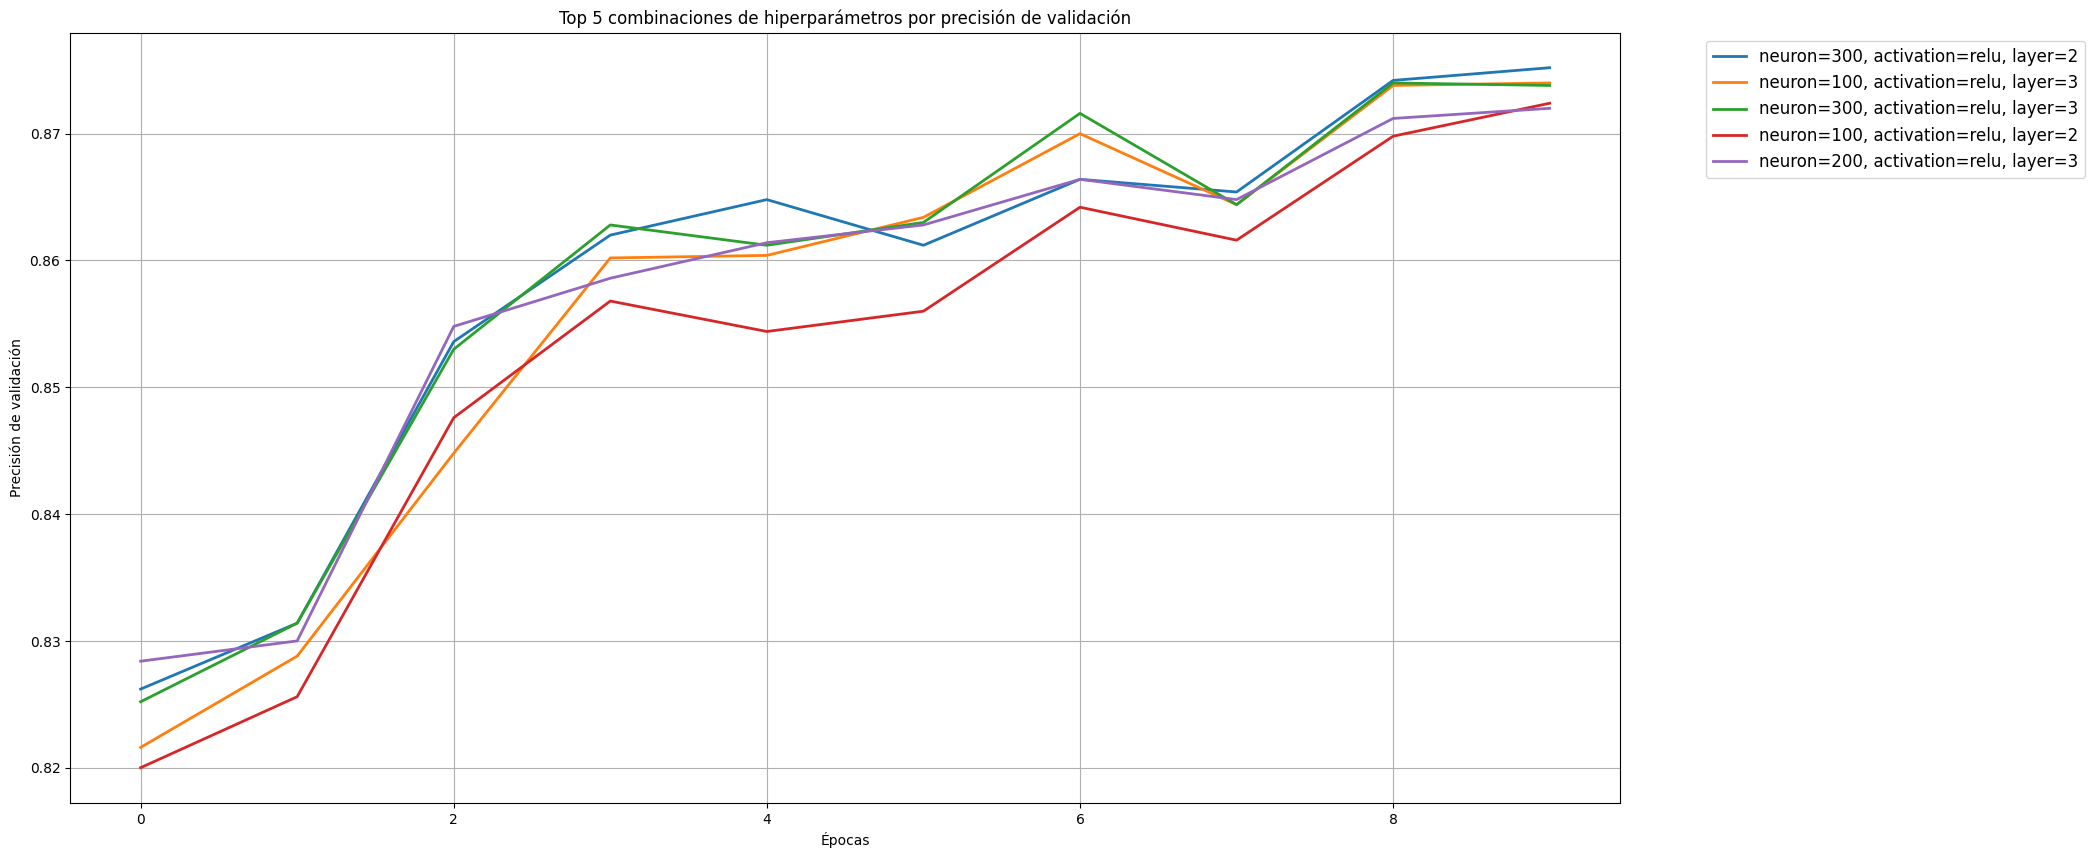

In [57]:
# Ordena los resultados por la precisión de validación final
sorted_results = sorted(results, key=lambda x: x['history'].history['val_accuracy'][-1], reverse=True)

# Selecciona las top 5 combinaciones con la mayor precisión de validación final
top_results = sorted_results[:5]

# Crea una figura para visualizar los resultados
plt.figure(figsize=(20, 10))

# Añade títulos y etiquetas a los ejes
plt.title('Top 5 combinaciones de hiperparámetros por precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión de validación')

# Itera sobre los resultados y crea un gráfico para cada uno
for result in top_results:
    plt.plot(result['history'].history['val_accuracy'], label=f"neuron={result['neuron']}, activation={result['activation']}, layer={result['layer']}", linewidth=2)

# Añade una cuadrícula
plt.grid(True)

# Añade una leyenda fuera del gráfico en la parte derecha
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='large')

# Muestra el gráfico
plt.show()

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [46]:
model.layers

In [47]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [48]:
weights, biases = hidden1.get_weights()
weights.shape

(784, 300)

In [49]:
biases.shape

(300,)

In [50]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [51]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 11s 4ms/step - loss: 0.7232 - accuracy: 0.7618 - val_loss: 0.5091 - val_accuracy: 0.8280
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4886 - accuracy: 0.8306 - val_loss: 0.4658 - val_accuracy: 0.8336
Epoch 3/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4423 - accuracy: 0.8443 - val_loss: 0.4250 - val_accuracy: 0.8508
Epoch 4/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4177 - accuracy: 0.8534 - val_loss: 0.3998 - val_accuracy: 0.8590
Epoch 5/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3972 - accuracy: 0.8607 - val_loss: 0.3914 - val_accuracy: 0.8622
Epoch 6/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3810 - accuracy: 0.8650 - val_loss: 0.4005 - val_accuracy: 0.8614
Epoch 7/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3680 - accuracy: 0.8686 - val_loss: 0.3769 - val_accur